In [1]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 8.1MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=0945afa99fe85f24bcbd9c1fede9f56b244fdce45a7ec8da0475a00d78ebb4e4
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=90590182520963e8dd301cd04bc521a5aab676e1267842bc43dd6fdd35d08ea2
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from keras.layers import Dropout

In [3]:
fashion=keras.datasets.fashion_mnist

**Loading and spilitting data in training and testing**

In [4]:
(x_train,y_train),(x_test,y_test)=fashion.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**Scaling of images to make it between 0 to 255**

In [5]:
x_train=x_train/255
x_test=x_test/255

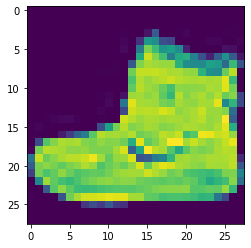

In [ ]:
plt.imshow(x_train[0])

In [6]:
x_train=x_train.reshape(len(x_train),28,28,1)
x_test=x_test.reshape(len(x_test),28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [8]:
from kerastuner.tuners import RandomSearch

In [9]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [10]:
tuner_search.search(x_train,y_train,epochs=3,validation_split=0.2)

Trial 5 Complete [00h 00m 21s]
val_accuracy: 0.9077500104904175

Best val_accuracy So Far: 0.9123333096504211
Total elapsed time: 00h 02m 16s
INFO:tensorflow:Oracle triggered exit


In [11]:
tuner_search.results_summary()

Results summary
Results in output/Mnist Fashion
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
conv_1_filter: 64
conv_1_kernel: 3
conv_2_filter: 48
conv_2_kernel: 3
dense_1_units: 64
learning_rate: 0.001
Score: 0.9123333096504211
Trial summary
Hyperparameters:
conv_1_filter: 80
conv_1_kernel: 3
conv_2_filter: 48
conv_2_kernel: 5
dense_1_units: 80
learning_rate: 0.001
Score: 0.909500002861023
Trial summary
Hyperparameters:
conv_1_filter: 96
conv_1_kernel: 3
conv_2_filter: 48
conv_2_kernel: 5
dense_1_units: 64
learning_rate: 0.001
Score: 0.9077500104904175
Trial summary
Hyperparameters:
conv_1_filter: 32
conv_1_kernel: 3
conv_2_filter: 64
conv_2_kernel: 3
dense_1_units: 112
learning_rate: 0.01
Score: 0.8788333535194397
Trial summary
Hyperparameters:
conv_1_filter: 112
conv_1_kernel: 3
conv_2_filter: 48
conv_2_kernel: 5
dense_1_units: 80
learning_rate: 0.01
Score: 0.8766666650772095


In [ ]:
x_train=x_train.reshape(len(x_train),28,28,1)


In [ ]:
data_augumentation=keras.Sequential(
    [
     layers.experimental.preprocessing.RandomZoom(0.2),
     layers.experimental.preprocessing.RandomContrast(0.1),
     

     ]
                                    )
    


**Here we have used earlystopping also to prevent model overfitting**

In [15]:
cnn = keras.Sequential([
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=(1,1)),
    Dropout(0.1),
    keras.layers.Conv2D(filters=48, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=(1,1)),
    Dropout(0.1),
  
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    Dropout(0.1),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=0, mode='auto')

history = cnn.fit(x_train,y_train, epochs=20, 
                    validation_data=(x_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5779 - accuracy: 0.7925 - val_loss: 0.3133 - val_accuracy: 0.8866
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2784 - accuracy: 0.8970 - val_loss: 0.2542 - val_accuracy: 0.9092
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2256 - accuracy: 0.9169 - val_loss: 0.2360 - val_accuracy: 0.9130
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1865 - accuracy: 0.9310 - val_loss: 0.2513 - val_accuracy: 0.9118
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1689 - accuracy: 0.9381 - val_loss: 0.2367 - val_accuracy: 0.9148
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1423 - accuracy: 0.9459 - val_loss: 0.2460 - val_accuracy: 0.9145
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1274 - accuracy: 0.9510 - val_loss: 0.2385 - val_accuracy:

In [16]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4503 - accuracy: 0.9172


[0.45026522874832153, 0.9172000288963318]

**for prediction purpose we use argmax function, because softmax will give probability then we need to choose highest probability value and corrosponding index for that **

In [17]:
pred1=cnn.predict(x_test)

In [18]:
pred1[1]

array([1.3560759e-09, 8.7465642e-34, 1.0000000e+00, 4.9632524e-17,
       2.7071196e-20, 1.2568495e-28, 1.3036870e-14, 8.4818579e-27,
       5.3826962e-30, 8.5519355e-35], dtype=float32)

In [19]:
np.argmax(pred1[1])

2

In [20]:
y_prediction=[np.argmax(i) for i in pred1]

In [ ]:
y_prediction[:5]

[9, 2, 1, 1, 6]

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [22]:
cm=confusion_matrix(y_test,y_prediction)

<function matplotlib.pyplot.show>

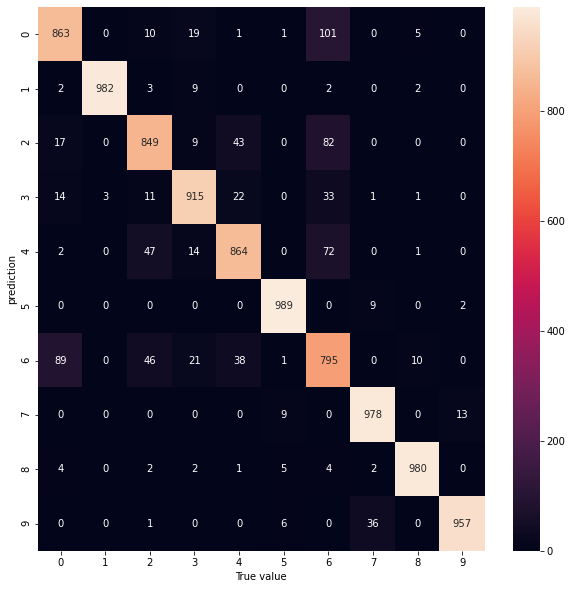

In [23]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("True value")
plt.ylabel("prediction")
plt.show

**maximum misclassification is happening in T shirt,shirt and coat as these images are considered very similar in nature**

TypeError: ignored